<a href="https://colab.research.google.com/github/SaharFallah99/MobileNetV2_practice/blob/main/horse_human.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/horse-or-human.zip -O /content/horse-or-human.zip
!wget --no-check-certificate https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip -O /content/validation-horse-or-human.zip

--2024-10-27 19:51:18--  https://storage.googleapis.com/learning-datasets/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘/content/horse-or-human.zip’

/content/horse-or-h 100%[===================>] 142.65M   147MB/s    in 1.0s    

2024-10-27 19:51:20 (147 MB/s) - ‘/content/horse-or-human.zip’ saved [149574867/149574867]

--2024-10-27 19:51:20--  https://storage.googleapis.com/learning-datasets/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 142.250.141.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application

In [2]:
import os
import zipfile

local_zip1 = '/content/horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip1, 'r')
zip_ref.extractall('/content/training')

local_zip2 = '/content/validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip2, 'r')
zip_ref.extractall('/content/validation')

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dir = '/content/training'
validation_dir = '/content/validation'

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

test_datagen = ImageDataGenerator(
    rescale = 1/255.
)

In [6]:
train_generator =  train_datagen.flow_from_directory(
    train_dir,
    batch_size = 64,
    class_mode = 'binary',
    target_size = (160,160)
)

test_generator =  test_datagen.flow_from_directory(
    validation_dir,
    batch_size = 64,
    class_mode = 'binary',
    target_size = (160,160)
)

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


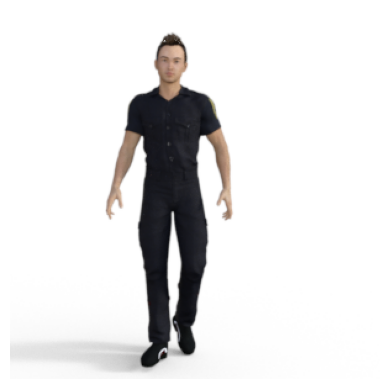

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('/content/validation/humans/valhuman01-01.png')[:,:,::-1]
img = np.expand_dims(img, axis = 0)
plt.imshow(img[0])
plt.axis('off')
plt.show()

array([[[114, 158, 224],
        [113, 158, 224],
        [113, 158, 223],
        ...,
        [242, 255, 255],
        [243, 255, 255],
        [244, 255, 255]],

       [[113, 159, 224],
        [113, 159, 223],
        [112, 159, 224],
        ...,
        [242, 255, 255],
        [242, 255, 255],
        [240, 254, 255]],

       [[114, 159, 224],
        [114, 159, 224],
        [114, 159, 224],
        ...,
        [242, 255, 255],
        [239, 253, 255],
        [233, 249, 255]],

       ...,

       [[211, 184, 160],
        [212, 184, 159],
        [217, 187, 159],
        ...,
        [255, 226, 202],
        [254, 224, 196],
        [253, 220, 191]],

       [[207, 181, 157],
        [210, 182, 155],
        [220, 190, 164],
        ...,
        [251, 217, 187],
        [245, 209, 178],
        [248, 213, 182]],

       [[205, 178, 155],
        [214, 186, 160],
        [221, 191, 164],
        ...,
        [254, 217, 186],
        [248, 212, 180],
        [247, 212, 179]]], dtype=uint8)
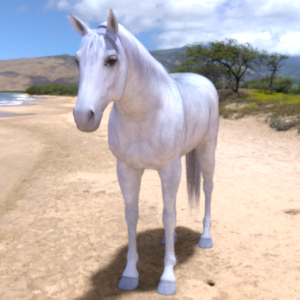

In [8]:
cv2.imread('/content/training/horses/horse01-0.png')[:,:,::-1]

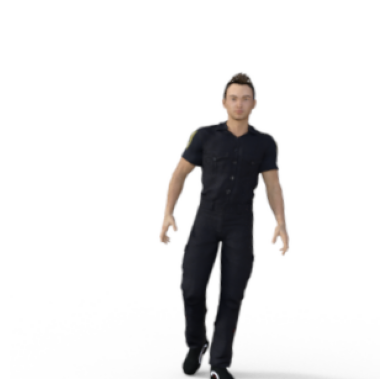

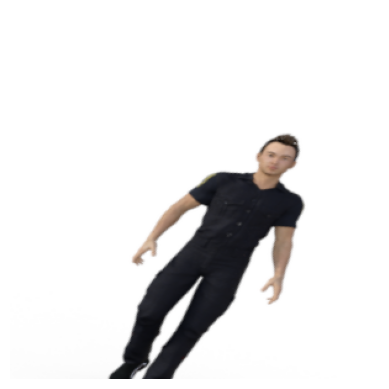

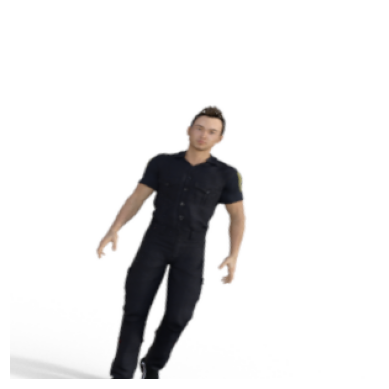

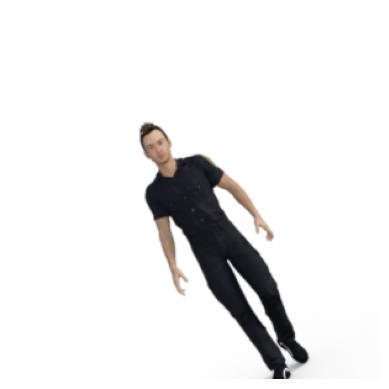

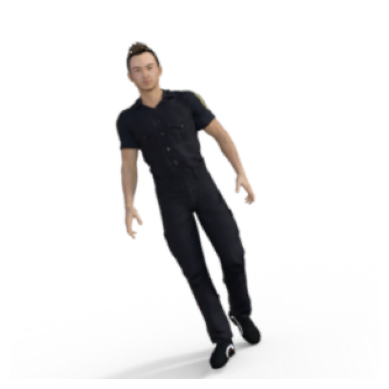

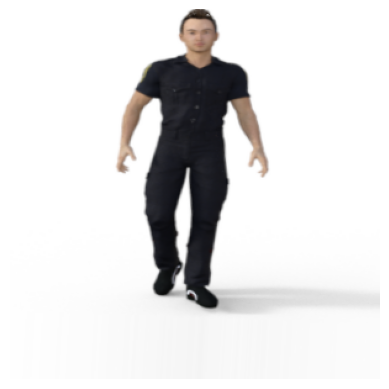

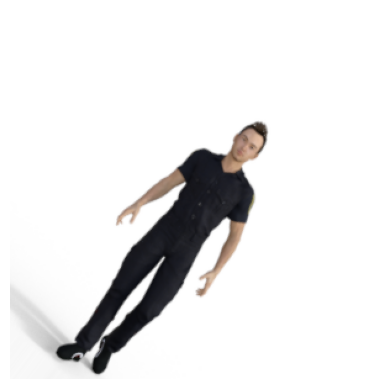

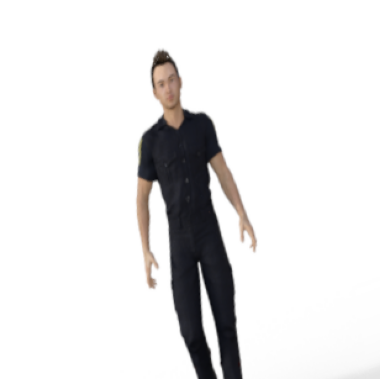

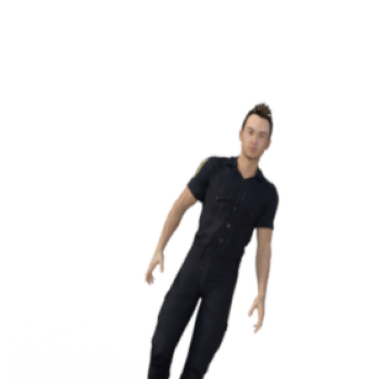

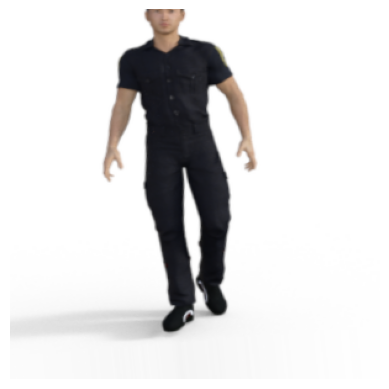

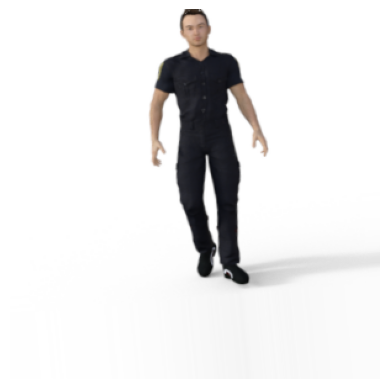

In [9]:
i = 0
for batch in train_datagen.flow(x = img, batch_size = 1):
  plt.imshow(batch[0])
  plt.axis('off')
  plt.show()
  i = i+1
  if i >10:
    break

In [10]:
from tensorflow.keras.applications import MobileNetV2

pre_trained_model = MobileNetV2(
    include_top = False,
    weights = 'imagenet',
    input_shape = (160,160,3),
    pooling = max
)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [11]:
pre_trained_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 2,223,872 (8.48 MB)

 Non-trainable params: 34,112 (133.25 KB)

In [12]:
for layer in pre_trained_model.layers:
  layer.trainable = False

In [13]:
pre_trained_model.summary()

Model: "mobilenetv2_1.00_160"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 2,257,984 (8.61 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,257,984 (8.61 MB)

In [14]:
last_layer=pre_trained_model.get_layer('out_relu')

In [15]:
last_output=last_layer.output

In [16]:
from keras.layers import Dense , Input, Dropout, Flatten
from keras.models import Sequential
from tensorflow.keras.optimizers import Adam

x=Flatten()(last_output)
x=Dense(units=64, activation='relu')(x)
x=Dropout(0.2)(x)
out_x=Dense(1,activation='sigmoid')(x)

In [17]:
from keras.models import Model
model=Model(pre_trained_model.input , out_x)
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy',metrics=['accuracy'])

In [18]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 160, 160, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1 (Conv2D)            │ (None, 80, 80, 32)     │            864 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ bn_Conv1                  │ (None, 80, 80, 32)     │            128 │ Conv1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ Conv1_relu (ReLU)         │ (None, 80, 80, 32)     │              0 │ bn_Conv1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise   │ (None, 80, 80, 32)     │            288 │ Conv1_relu[0][0]       │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │            128 │ expanded_conv_depthwi… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_depthwise_… │ (None, 80, 80, 32)     │              0 │ expanded_conv_depthwi… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project     │ (None, 80, 80, 16)     │            512 │ expanded_conv_depthwi… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ expanded_conv_project_BN  │ (None, 80, 80, 16)     │             64 │ expanded_conv_project… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand (Conv2D)   │ (None, 80, 80, 96)     │          1,536 │ expanded_conv_project… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_BN         │ (None, 80, 80, 96)     │            384 │ block_1_expand[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_expand_relu       │ (None, 80, 80, 96)     │              0 │ block_1_expand_BN[0][… │
│ (ReLU)                    │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_pad               │ (None, 81, 81, 96)     │              0 │ block_1_expand_relu[0… │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise         │ (None, 40, 40, 96)     │            864 │ block_1_pad[0][0]      │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block_1_depthwise_BN 

 Total params: 4,306,113 (16.43 MB)

 Trainable params: 2,048,129 (7.81 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [23]:
from tensorflow.keras.callbacks import ModelCheckpoint
check_point_path='/content/models/best_model.keras'
model_checkpoint_callback= ModelCheckpoint(
    filepath= check_point_path,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    save_weights_only=False
)

In [25]:
print('Num Params: ', model.count_params())
history=model.fit(
    train_generator,
    epochs=10,
    verbose=1,
    validation_data= test_generator,
    callbacks=[model_checkpoint_callback]
)

Num Params:  4306113
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 523ms/step - accuracy: 0.7837 - loss: 0.4823
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to /content/models/best_model.keras
17/17 ━━━━━━━━━━━━━━━━━━━━ 25s 774ms/step - accuracy: 0.7905 - loss: 0.4676 - val_accuracy: 1.0000 - val_loss: 0.0022
Epoch 2/10
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 469ms/step - accuracy: 0.9890 - loss: 0.0356
Epoch 2: val_accuracy did not improve from 1.00000
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 490ms/step - accuracy: 0.9893 - loss: 0.0349 - val_accuracy: 1.0000 - val_loss: 6.4412e-04
Epoch 3/10
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 386ms/step - accuracy: 0.9871 - loss: 0.0303
Epoch 3: val_accuracy did not improve from 1.00000
17/17 ━━━━━━━━━━━━━━━━━━━━ 19s 433ms/step - accuracy: 0.9872 - loss: 0.0301 - val_accuracy: 1.0000 - val_loss: 4.4000e-04
Epoch 4/10
16/17 ━━━━━━━━━━━━━━━━━━━━ 0s 352ms/step - accuracy: 0.9982 - loss: 0.0089
Epoch 4: val_accuracy did not improve from 1.00000
17/17 ━━━━━━━━━━━━━━━━━━━━ 21s 383ms/step - accura

Text(0.5, 1.0, 'Training and validation loss')

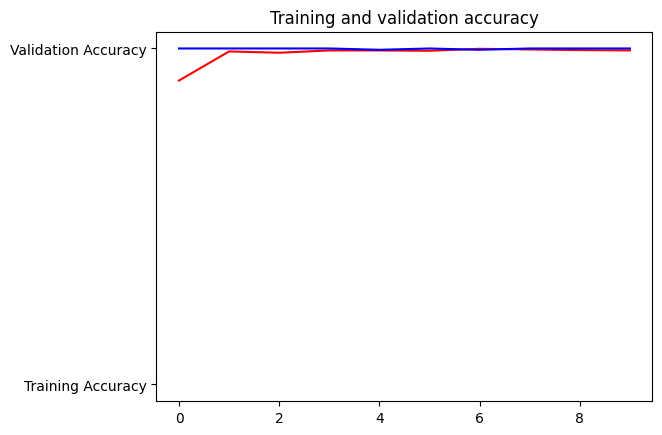

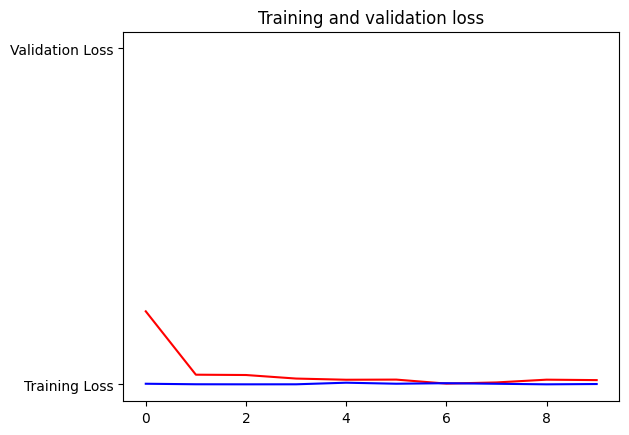

In [27]:
# PLOT LOSS AND ACCURACY
%matplotlib inline

import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")


plt.title('Training and validation loss')

In [28]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
    path = '/content/' + fn
    img = image.load_img(path, target_size=(160,160))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) / 255.
    classes = model.predict(x, batch_size=10)
    print(classes[0])
    if classes[0]>0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
[7.4521786e-08]
images.jfif is a horse
